___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [46]:
import pandas as pd
import numpy as np
from apriori import apriori

ModuleNotFoundError: No module named 'apriori'

In [ ]:
df = pd.read_csv('')
df.head()

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

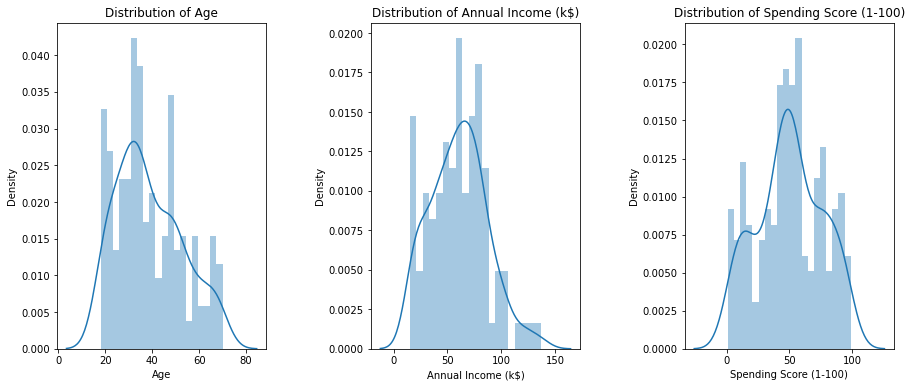

In [12]:
plt.figure (1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title ('Distribution of {}'.format (x))
plt.show()

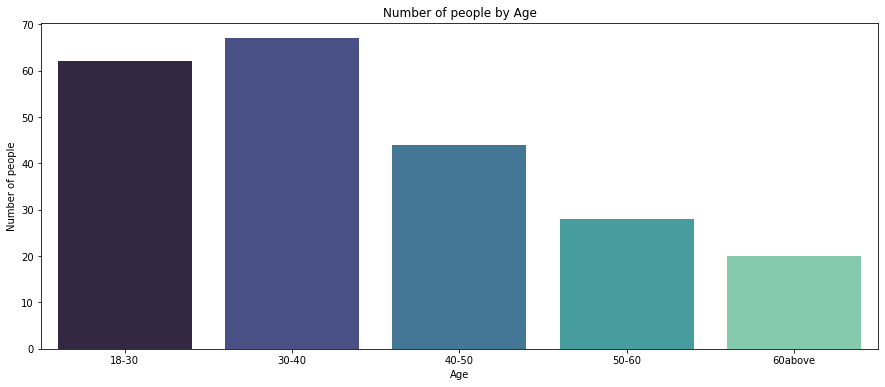

In [13]:
Age_18_30 = df.Age[(df.Age >= 18) & (df.Age <= 30)]
Age_30_40 = df.Age[(df.Age >= 30) & (df.Age <= 40)] 
Age_40_50 = df.Age[(df.Age >= 40) & (df.Age <= 50)]
Age_50_60 = df.Age[(df.Age >= 50) & (df.Age <= 60)]
Age_60above = df.Age[(df.Age >= 60)]
                                        
agex = ["18-30" , "30-40" , "40-50" , "50-60","60above"]
agey = [len(Age_18_30.values),len(Age_30_40.values),len(Age_40_50 .values),len(Age_50_60.values),len(Age_60above.values)]

                                                                                                     
plt.figure(figsize = (15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title ("Number of people by Age")
plt.xlabel ("Age")
plt.ylabel ("Number of people")
plt.show ()

Дослідимо взаємозвязок між віком та доходом

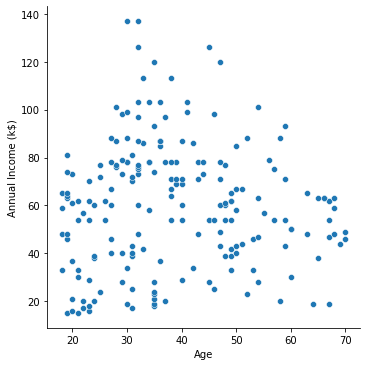

In [14]:
sns.relplot(x="Age", y="Annual Income (k$)",data=df)

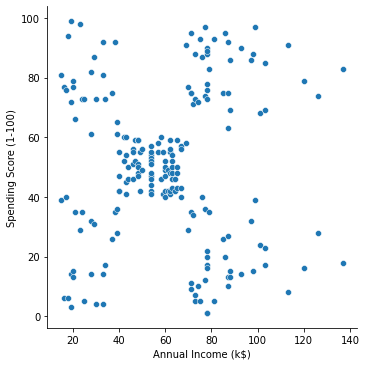

In [15]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=df)

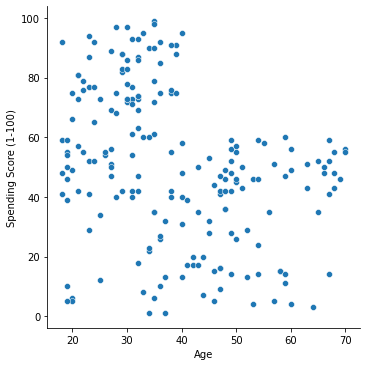

In [16]:
sns.relplot(x="Age", y="Spending Score (1-100)",data=df)

In [23]:
from sklearn.cluster import KMeans

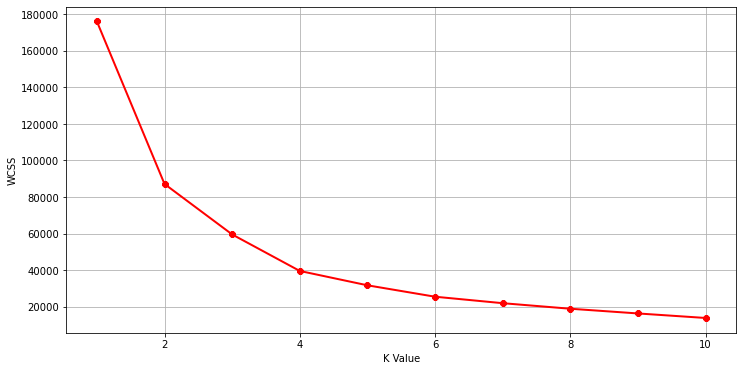

In [24]:
X1=df.loc[:, ["Age", "Annual Income (k$)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit (X1)
    wcss.append(kmeans.inertia_)
plt.figure (figsize= (12,6))
plt.grid ()
plt.plot (range(1,11),wcss,linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel ("WCSS")
plt.show()

Кількість кластерів = 5


In [25]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict (X1)

print(label)

[3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 2 3 2 3 3
 3 3 3 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 4 0 0 0 2 4 4 4 0 4 4 4 0 4 4 4 4 4 4 4 0 4 0 4 4 4 0 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
print (kmeans.cluster_centers_)

[[ 24.63333333  59.33333333]
 [ 36.6        109.7       ]
 [ 56.62        48.48      ]
 [ 29.53658537  27.24390244]
 [ 38.25423729  77.91525424]]


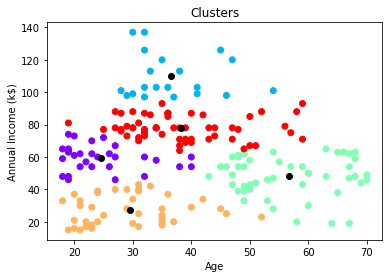

In [27]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color= 'black')
plt.title ('Clusters')
plt.xlabel ('Age')
plt.ylabel ('Annual Income (k$)')
plt.show()

In [28]:
from sklearn.cluster import KMeans

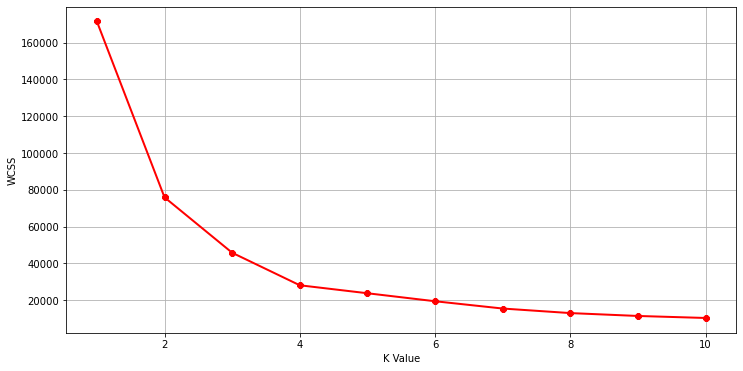

In [32]:
X2=df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit (X2)
    wcss.append(kmeans.inertia_)
plt.figure (figsize= (12,6))
plt.grid ()
plt.plot (range(1,11),wcss,linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel ("WCSS")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict (X2)

print(label)

[1 3 4 3 1 3 4 3 2 3 2 3 2 3 4 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 4 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 4 3 0 3 2 3 2 3 1 3 4 3 2 3 4 3 2 3 1 3 4 3 0 3
 4 3 2 3 2 3 2 3 4 3 4 3 0 3 4 3 2 3 2 3 4 1 4 3 4 3 2 3 2 3 2 3 1 3 2 3 1
 3 2 3 2 3 4 3 4 3 2 3 2 3 4 3]


In [34]:
print (kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.91489362 49.21276596]
 [50.46666667 16.1       ]
 [30.1754386  82.35087719]
 [30.55555556 13.05555556]]


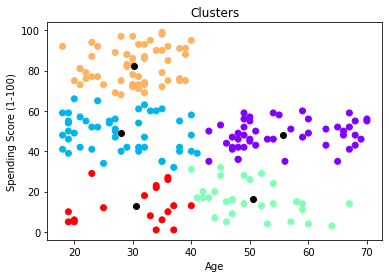

In [36]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color= 'black')
plt.title ('Clusters')
plt.xlabel ('Age')
plt.ylabel ('Spending Score (1-100)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

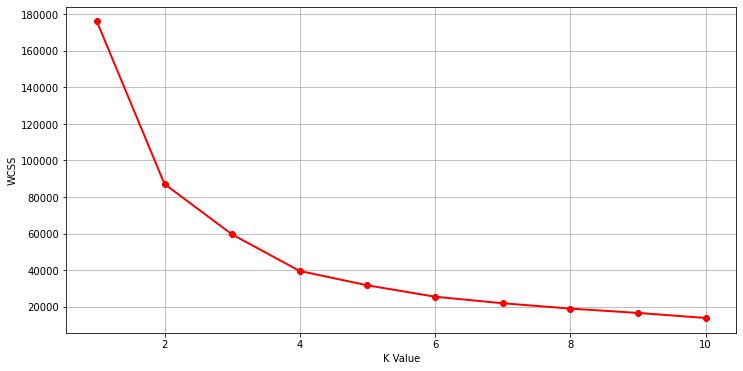

In [37]:
X3=df.loc[:, ["Spending Score (1-100)", "Annual Income (k$)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit (X1)
    wcss.append(kmeans.inertia_)
plt.figure (figsize= (12,6))
plt.grid ()
plt.plot (range(1,11),wcss,linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel ("WCSS")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict (X3)

print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [44]:
print (kmeans.cluster_centers_)

[[49.51851852 55.2962963 ]
 [17.11428571 88.2       ]
 [20.91304348 26.30434783]
 [82.12820513 86.53846154]
 [79.36363636 25.72727273]]


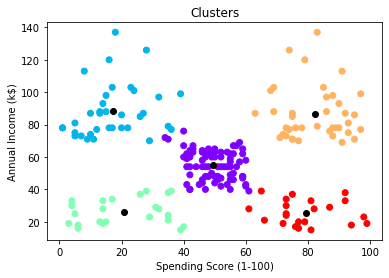

In [45]:
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color= 'black')
plt.title ('Clusters')
plt.ylabel ('Annual Income (k$)')
plt.xlabel ('Spending Score (1-100)')
plt.show()

In [49]:
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

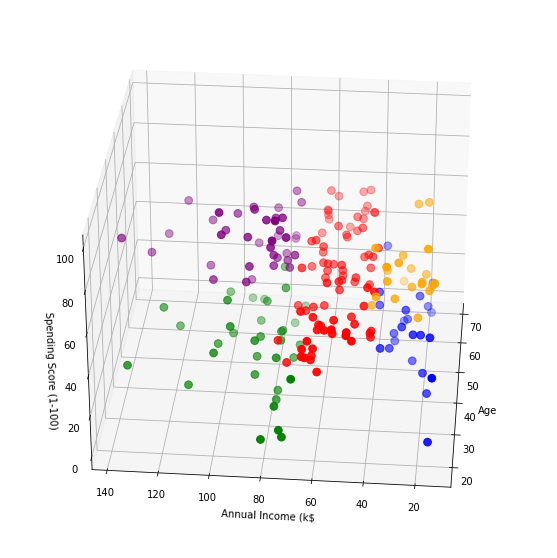

In [52]:
clusters =kmeans.fit_predict(X3)
df["label"] = clusters

import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],df["Spending Score (1-100)"][df.label == 0], c='blue', s =60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1], c='red', s =60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2],df["Spending Score (1-100)"][df.label == 2], c='green', s =60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3],df["Spending Score (1-100)"][df.label == 3], c='orange', s =60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4],df["Spending Score (1-100)"][df.label == 4], c='purple', s =60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

Висновок:  На основі аналізу можемо виділити 5 кластерів:
1 кластер (синій) - включає осіб з низьким рівнем доходу та низьким показником витрат
2 кластер -(жовтний) - включає осіб з низьким рівнем доходу та високим показником витрат
3 кластер -(червоний) - включає осіб, старше 50 років з середнім рівнем доходу та середнім та високим показником витрат
4 кластер  -(Зелений) - включає осіб з середнім та високим рівнем доходу та  середнім  показником витрат
5 кластер  -(фіолетовий) - включає осіб з середнім та високим рівнем доходу та високими  показниками витрат.
